https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

In [75]:
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

Motivation: on peut modéliser des cas complexes juste an ajoutant la non linéarité sigmoïde.
Par exemple, en ajoutant des termes ^2 en features - et éventuellement des termes croisés.

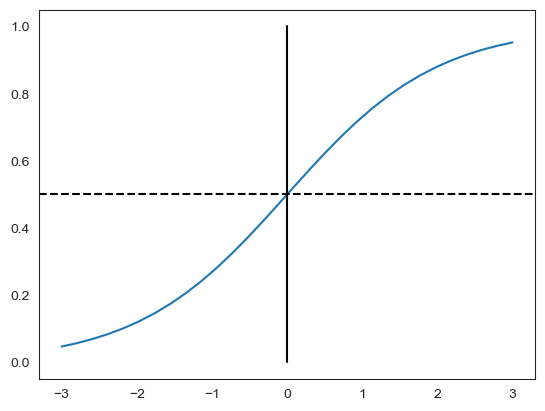

In [76]:
x_lim = (-3, 3)
x = np.linspace(x_lim[0], x_lim[1], 30)
y = sigmoide(x)
plt.plot(x, y)
plt.plot([0, 0], [0, 1], 'k-')
plt.axhline(0.5, color='k', linestyle='--')
plt.show()

,x_0,x_1,x_2
0,1.0,0.343532,-4.827768
1,1.0,4.478649,-0.871657
2,1.0,-0.683884,-3.343824
3,1.0,-0.073574,1.576034
4,1.0,1.871527,0.526369


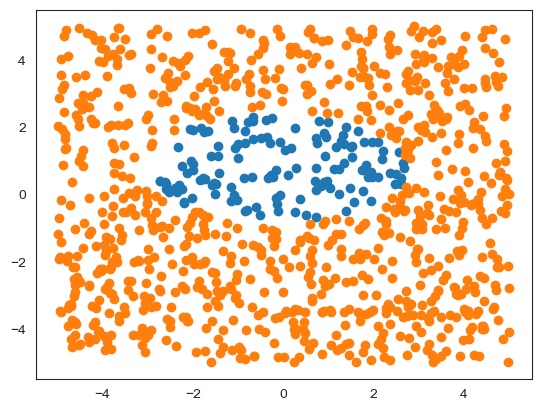

In [77]:
import pandas as pd

n = 1000
# 2 features = x_1 et x_2
df = pd.DataFrame(np.concatenate([np.ones((n, 1)), 10 * (np.random.random((n,2)) - 0.5)], axis = 1), columns = ['x_0', 'x_1', 'x_2'])
display(df.head(5))

# feature engineering : on ajoute x_1^2 et x_2^2 
df['x_1^2'] = df['x_1'] ** 2
df['x_2^2'] = df['x_2'] ** 2

# choix arbitraire de theta
theta = [4.5, -0.2, 3.5, -0.7, -2.3]

df['y'] = sigmoide(df.values @ theta)

positives = df[df['y'] > 0.5]
negatives = df[df['y'] <= 0.5]

plt.scatter(positives['x_1'].values, positives['x_2'].values)
plt.scatter(negatives['x_1'].values, negatives['x_2'].values)

On veut une fonction coût convexe. Elle ne le serait pas si on calcait sa définition sur celle de la régression linéaire.

In [78]:
def cout(X, y, theta):
    m = len(y)
    h = sigmoide(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))  # y = 1 ou y = 0
    return cost

In [93]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    params = theta.copy()
    m = len(y)
    cost_history = np.zeros((iterations,1))

    print(f"{params.shape=}")
    print(f"{X.shape=}")
    print(f"{y.shape=}")

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoide(X @ params) - y)) 
        cost_history[i] = cout(X, y, params)

    return (cost_history, params)

In [80]:
def predict(X, params):
    return np.round(sigmoide(X @ params))

<Axes: >

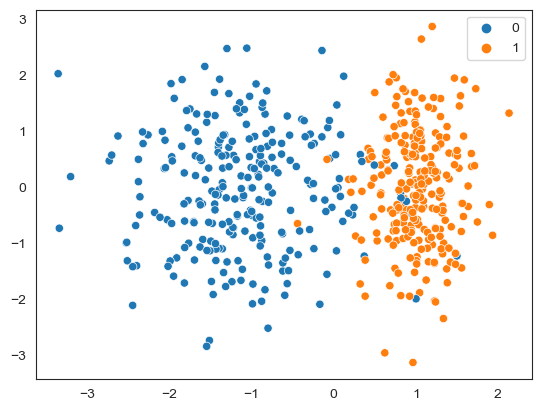

In [88]:
X_without_bias, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=14)
sns.scatterplot(x=X_without_bias[:,0], y=X_without_bias[:,1], hue=y)

In [85]:
print(X.shape)
np.size(X,1)

(500, 3)


3

params.shape=(3, 1)
Initial Cost is: [[0.69312718]] 

params.shape=(3, 1)
X.shape=(500, 3)
y.shape=(500, 1)
Optimal Parameters are: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



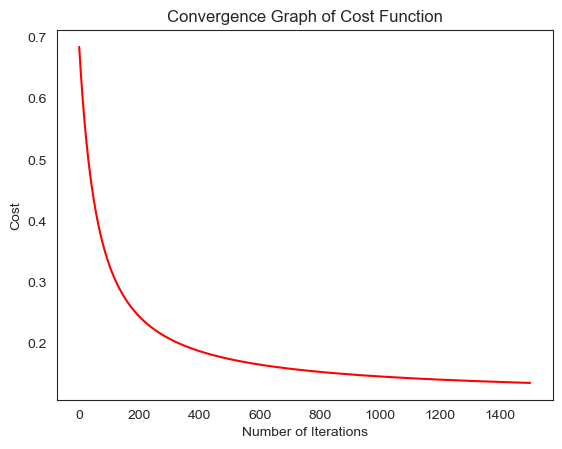

In [95]:
m = len(y)

X = np.hstack((np.ones((m,1)), X_without_bias))
y = y.reshape(-1, 1)

n = X.shape[1]
params = np.zeros((n,1))
print(f"{params.shape=}")


iterations = 1500
learning_rate = 0.03

initial_cost = cout(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [96]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

0.966


In [ ]:
# TODO : F1 score https://www.v7labs.com/blog/f1-score-guide#:~:text=for%20Machine%20Learning-,What%20is%20F1%20score%3F,prediction%20across%20the%20entire%20dataset.

In [101]:
df = pd.DataFrame(X)
df["y"] = y
df["y_pred"] = y_pred
df['TP'] = df[df["y"]  (df["y"] == df["y_pred"])
df

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().